In [51]:
import geopandas as gpd
print(gpd.__version__)
import pandas as pd
import os
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from shapely.geometry import Polygon, MultiPolygon, Point
import networkx as nx



0.14.3


Unary Union

Exploration

In [18]:
godavari = gpd.read_file("/data/sand_mining/osm/osm_rivers_matched_new/Godavari.shp")
godavari.unary_union

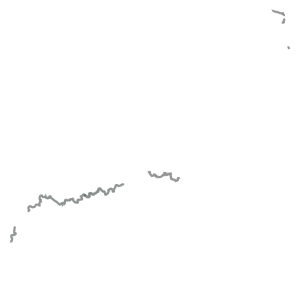

In [20]:
alaknanda = gpd.read_file("/data/sand_mining/osm/osm_rivers_matched_new/Alaknanda.shp")
alaknanda.unary_union

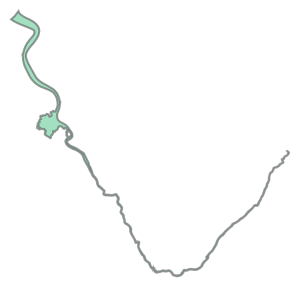

In [21]:
amba = gpd.read_file("/data/sand_mining/osm/osm_rivers_matched_new/Amba.shp")
amba.unary_union

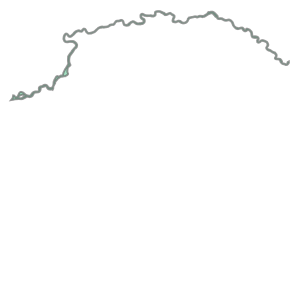

In [22]:
ambika = gpd.read_file("/data/sand_mining/osm/osm_rivers_matched_new/Ambika.shp")
ambika.unary_union

Unary Union Method

In [4]:
dir = "/data/sand_mining/osm/osm_rivers_matched_new"

result_df = gpd.GeoDataFrame(geometry=[], crs=4326)

for filename in os.listdir(dir):
    if filename.endswith(".shp"):
        gdf = gpd.read_file(os.path.join(dir, filename))
        unioned_geometry = unary_union(gdf.geometry)
        new_row = gpd.GeoDataFrame({'geometry': [unioned_geometry], 'filename': [filename]}, crs=4326)
        result_df = pd.concat([result_df, new_row], ignore_index=True)

print(result_df)

                                             geometry        filename
0   MULTIPOLYGON (((3293976.56455 4221770.30631, 3...      Guhiya.shp
1   MULTIPOLYGON (((4839857.61416 3962256.08014, 4...     Jalangi.shp
2   MULTIPOLYGON (((3268261.14394 3826850.77965, 3...        Mahi.shp
3   MULTIPOLYGON (((3657870.78264 3875342.51405, 3...     Parbati.shp
4   MULTIPOLYGON (((3159405.02527 4122978.43865, 3...        Luni.shp
..                                                ...             ...
93  MULTIPOLYGON (((4133196.43322 4363987.82403, 4...    Ghaghara.shp
94  POLYGON ((5250999.62161 3935402.95084, 5251040...  Karnaphuli.shp
95  MULTIPOLYGON (((3579298.52249 4766584.23351, 3...      Satluj.shp
96  MULTIPOLYGON (((3385321.89938 3291354.74942, 3...     Krishna.shp
97  MULTIPOLYGON (((3837340.71429 3278502.67316, 3...        Musi.shp

[98 rows x 2 columns]


In [15]:
#Find the list of shapefiles that have polygon geometry
polygon_filenames = []

for i, row in result_df.iterrows():
    if isinstance(row['geometry'], Polygon):
        polygon_filenames.append(row['filename'])

print(polygon_filenames)

['Lohit__Tellu.shp', 'Dihang_Siang.shp', 'Amba.shp', 'Andi_Odai.shp', 'Anjari_N.shp', 'Bharathapuzha_Ponnani.shp', 'Bura.shp', 'Dhaleswari.shp', 'Gorinkala_Drain.shp', 'Deh.shp', 'Katakhal.shp', 'Kotawali_Rao.shp', 'Pranhitha.shp', 'Shastri.shp', 'Ther.shp', 'Thoubal.shp', 'Trichang.shp', 'Tuichawng.shp', 'Vaippar.shp', 'Zungki.shp', 'Sharavati.shp', 'Sonai_or_Tulralal.shp', 'Barak.shp', 'Mahanadi.shp', 'Hooghly.shp', 'Imphal_Manipur.shp', 'Torsa.shp', 'Salpe.shp', 'Ambika.shp', 'Karnaphuli.shp']


In [14]:
#Find the list of shapefiles that have multipolygon geometry
multipolygon_filenames = []

for i, row in result_df.iterrows():
    if isinstance(row['geometry'], MultiPolygon):
        multipolygon_filenames.append(row['filename'])

print(multipolygon_filenames)

['Guhiya.shp', 'Jalangi.shp', 'Mahi.shp', 'Parbati.shp', 'Luni.shp', 'Subansiri.shp', 'Kameng.shp', 'Ajay.shp', 'Alaknanda.shp', 'Arjuna.shp', 'Baitarani.shp', 'Banas.shp', 'Barakar.shp', 'Beas.shp', 'Bhagirathi.shp', 'Brahmaputra.shp', 'Cauvery.shp', 'Chambal.shp', 'Chenab.shp', 'Ganga.shp', 'Godavari.shp', 'Indravati.shp', 'Kalinadi.shp', 'Kallada.shp', 'Kopili.shp', 'Koraiyar.shp', 'Manjra.shp', 'Muneru.shp', 'Nagavali.shp', 'Narmada.shp', 'Netravati.shp', 'Ojat.shp', 'Pennar.shp', 'Purna.shp', 'Saraswati.shp', 'Shetrunji.shp', 'Subarnarekha.shp', 'Tapi.shp', 'Tons.shp', 'Tungabhadra.shp', 'Vaigai.shp', 'Wainganga.shp', 'Wardha.shp', 'Gomati.shp', 'Bhima.shp', 'Betwa.shp', 'Yamuna.shp', 'Gandak.shp', 'Barak_or_Ahu_or_Turuong.shp', 'Brahmani.shp', 'Ghagghar.shp', 'Sone.shp', 'Sabarmati.shp', 'Damodar.shp', 'Jaldhaka.shp', 'Teesta.shp', 'Hasdeo.shp', 'Vamsadhara.shp', 'Gundlakamma.shp', 'Periyar.shp', 'Dindi.shp', 'Ulhas.shp', 'Palar.shp', 'Ponnaiyar.shp', 'Ghaghara.shp', 'Satluj.shp'

Verification

Shapely Properties Check (Works)

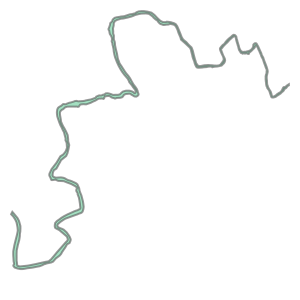

In [53]:
Karnaphuli = gpd.read_file("/data/sand_mining/osm/osm_rivers_matched_new/Karnaphuli.shp")
Karnaphuli.unary_union

In [55]:
unioned_geometry = unary_union(Karnaphuli.geometry)

if unioned_geometry.is_valid and unioned_geometry.is_simple:
    print("The river polygons are all connected.")
else:
    print("There are gaps or missing polygons in the river.")

The river polygons are all connected.


Exterior Method

In [45]:
exterior = Karnaphuli.geometry.apply(lambda g: g.exterior)

unioned_exterior = unary_union(exterior)

if isinstance(unioned_exterior, gpd.GeoSeries) and len(unioned_exterior) == 1:
    print("The river polygons are all connected.")
else:
    print("There are gaps or missing polygons in the river.")

There are gaps or missing polygons in the river.


Boundaries method

In [46]:
unioned_boundary = unary_union(Karnaphuli.geometry.boundary)
if isinstance(unioned_boundary, gpd.GeoSeries) and len(unioned_boundary) == 1:
    print("The river polygons are all connected.")
else:
    print("There are gaps or missing polygons in the river.")

There are gaps or missing polygons in the river.


NetworkX Graph Method

In [57]:
G = nx.Graph()

# Add nodes and edges to the graph
for idx, row in Karnaphuli.iterrows():
    for i, seg in enumerate(row.geometry.exterior.coords):
        G.add_node(seg)
        for j, other_seg in enumerate(row.geometry.exterior.coords):
            if i < j:
                seg_point = Point(seg)
                other_point = Point(other_seg)
                if seg_point.intersects(other_point):
                    G.add_edge(seg, other_seg)

    for interior in row.geometry.interiors:
        for i, seg in enumerate(interior.coords):
            G.add_node(seg)
            for j, other_seg in enumerate(interior.coords):
                if i < j:
                    seg_point = Point(seg)
                    other_point = Point(other_seg)
                    if seg_point.intersects(other_point):
                        G.add_edge(seg, other_seg)

# Check the number of connected components
if nx.number_connected_components(G) > 1:
    print("There are gaps or missing polygons in the river.")
else:
    print("The river polygons are all connected.")

There are gaps or missing polygons in the river.


Shortest Path with NetworkX

In [ ]:
from shapely.geometry import LineString

G = nx.Graph()

# Add edges between nodes in each polygon's exterior and interiors based on proximity
def add_edges_from_polygon(polygon, graph):
    points = list(polygon.exterior.coords)
    for interior in polygon.interiors:
        points.extend(interior.coords)
    points = [Point(p) for p in points]
    for i in range(len(points)):
        graph.add_node(points[i])
        for j in range(i + 1, len(points)):
            graph.add_edge(points[i], points[j], weight=points[i].distance(points[j]))

for geom in result_df.geometry:
    add_edges_from_polygon(geom, G)

# Identify all connected components
components = list(nx.connected_components(G))
if len(components) > 1:
    print("There are gaps or missing polygons in the river.")
    # Find the shortest path between the components
    min_distance = float('inf')
    best_pair = None
    for i in range(len(components)):
        for j in range(i + 1, len(components)):
            for u in components[i]:
                for v in components[j]:
                    dist = u.distance(v)
                    if dist < min_distance:
                        min_distance = dist
                        best_pair = (u, v)
    if best_pair:
        # Add a direct edge to connect these two points
        G.add_edge(*best_pair, weight=min_distance)
        # Add this line to the result_df to visualize the new connection
        new_line = LineString([best_pair[0], best_pair[1]])
        new_row = gpd.GeoDataFrame({'geometry': [new_line]}, crs=result_df.crs)
        result_df = pd.concat([result_df, new_row], ignore_index=True)